In [13]:
import pandas as pd 
import numpy as np 
import cv2 as cv 
import argparse
import os
import time
import matplotlib.pyplot as plt 


In [14]:
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)


In [15]:
img = cv.imread('../images/squirrel.png')


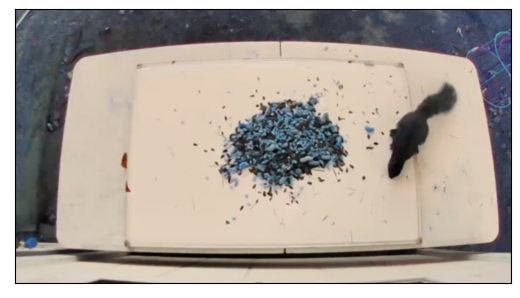

In [16]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


Blob shape=(1, 3, 416, 416)


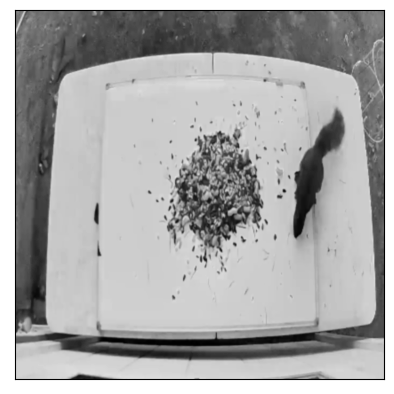

Blob shape=(1, 3, 416, 416)


In [17]:
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
text = f'Blob shape={blob.shape}'
print(text)
r = blob[0, 0, :, :]

plt.imshow(r, cmap = 'gray', interpolation = 'bicubic')
  # to hide tick values on X and Y axis
plt.show()
print(text)

In [21]:

net.setInput(blob)
t0 = time.time()
outputs = net.forward(ln)
t = time.time()
print('time=', t-t0)

print(len(outputs))
for out in outputs:
    print(out.shape)

def trackbar2(x):
    confidence = x/100
    r = r0.copy()
    for output in np.vstack(outputs):
        if output[4] > confidence:
            x, y, w, h = output[:4]
            p0 = int((x-w/2)*416), int((y-h/2)*416)
            p1 = int((x+w/2)*416), int((y+h/2)*416)
            cv.rectangle(r, p0, p1, 1, 1)
    plt.imshow('blob', r)
    plt.xticks([]), plt.yticks([])
    plt.show()




r0 = blob[0, 0, :, :-1]
r = r0.copy()
trackbar2()


time= 0.4272480010986328
254
(1, 32, 416, 416)
(1, 32, 416, 416)
(1, 32, 416, 416)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 32, 208, 208)
(1, 32, 208, 208)
(1, 32, 208, 208)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 64, 104, 104)
(1, 64, 104, 104)
(1, 64, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 64, 104, 104)
(1, 64, 104, 104)
(1, 64, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 128, 52,

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 32 and the array at index 3 has size 64

In [ ]:

boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

for output in outputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)

indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)